In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
import plotly.express as px
plt.rcParams['figure.figsize']=(25,6)
np.random.seed(0)
import random
random.seed(0)

In [2]:

def sine(length, freq=0.04, coef=1.5, offset=0.0, noise_amp=0.05):
    # timestamp = np.linspace(0, 10, length)
#     freq = np.random.choice(0.2)
    timestamp = np.arange(length)
    value = np.sin(2 * np.pi * freq * timestamp)
    if noise_amp != 0:
        noise = np.random.normal(1, 2, length)
        value = value + noise_amp * noise
    value = coef * value + offset
    return value

def square_sine(level, length, freq, coef, offset, noise_amp):
    value = np.zeros(length)
    for i in range(level):
        value += 1 / (2 * i + 1) * sine(length=length, freq=freq * (2 * i + 1), coef=coef, offset=offset, noise_amp=noise_amp)
    return value


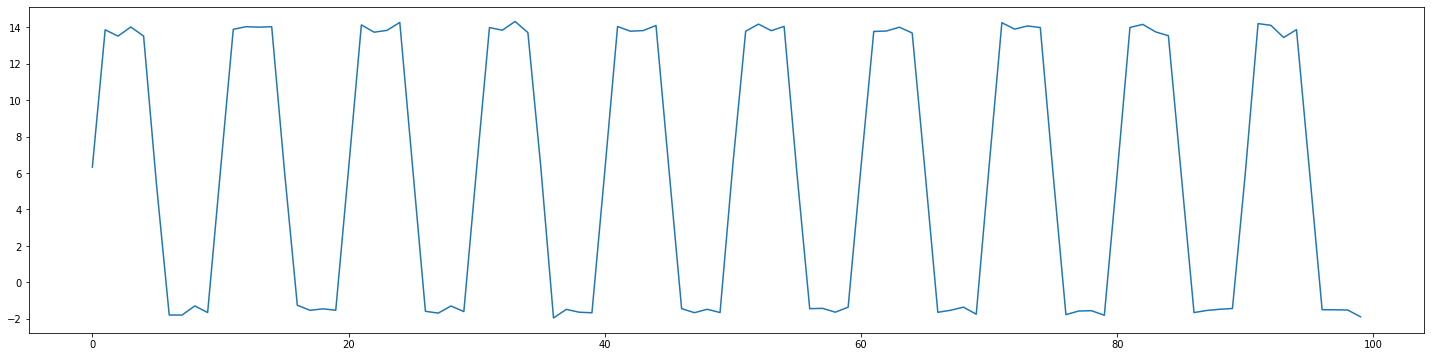

In [17]:
plt.plot(square_sine(50,100,0.1,10,2,0.01))
plt.plot(list(map()))

In [30]:
class  Synthetic_data:
    def __init__(self):    
        df = pd.read_csv("/mnt/cat/data/sandy/Forecasting/data/electricity_load_forecasting_panama/continuous_dataset.csv")
        self.dup = df.copy()
        self.data = df['nat_demand']
        self.offset = np.mean(self.data)
        self.length = len(self.data)
        self.label = np.zeros_like(self.data)
    def sine(self,length, freq=0.04, coef=1.5, offset=0.0, noise_amp=0.05):
        timestamp = np.arange(length)
        value = np.sin(2 * np.pi * freq * timestamp)
        if noise_amp != 0:
            noise = np.random.normal(1, 2, length)
            value = value + noise_amp * noise
        value = coef * value + offset
        return value

    def index_inj(self,radius,ratio):
        np.random.seed(20)
        position = np.random.randint(low=0,high=self.length,size=round(self.length*ratio/(2*radius)))
        return position
    def sub_data(self,freq,length,coef,offset,noise_amp=0.01,level=5):
        timestamp = np.arange(length)
        value = np.zeros(length)
        for i in range(level):
            value += 1 / (2 * i + 1) * sine(length=length, freq=freq * (2 * i + 1), coef=coef, offset=offset, noise_amp=noise_amp)
        return value
    def generate_data(self,radius=50,ratio=0.05):
        position = self.index_inj(radius,ratio)
        self.indices = []
        for i in position:
            start,end = max(0,i-np.random.randint(0,radius)),min(self.length,i+np.random.randint(0,radius+1))
            freq_d = np.random.choice(np.random.rand(10))
            length_d = end-start
            coef_d = np.random.randint(1000)*np.random.choice([-1,1])
            offset_d = np.random.randint(self.offset)
            # print(start,end,freq_d,coef_d,offset_d)
            
            self.data[start:end] = self.sub_data(freq_d,length_d,coef_d,offset_d)
            self.indices.append([start,end-1])
            self.label[start:end]=1
    def amplitude(self,radius=50,ratio=0.05):
        position = self.index_inj(radius,ratio)
        self.indices = []
        for i in position:
            start,end = max(0,i-np.random.randint(0,radius)),min(self.length,i+np.random.randint(0,radius+1))
            coef_d = np.random.randint(1000)*np.random.choice([-1,1])
            self.data[start:end] += coef_d
            self.indices.append([start,end-1])
            self.label[start:end]=1
    def pointwise_global(self,radius=1,ratio=0.05):
        position = self.index_inj(radius,ratio)
        for i in position:
            coef_d = np.random.randint(1000)*np.random.choice([-1,1])
            self.data[i] += coef_d
            self.label[i]=1
    def percentage(self):
        print(len(self.label[self.label==1])/len(self.data)*100)
    def plot_graph(self):
        for i in self.indices:
            plt.axvspan(i[0],i[1],color='RED',alpha = 0.3)
        plt.plot(self.data)
    def savedateset(self):
        data = pd.DataFrame({'datetime':self.dup['datetime'],'nat_demand':self.data,'label':self.label})
        data.to_csv("/mnt/cat/data/sandy/Forecasting/data/electricity_load_forecasting_panama/elect_2_percent_point_global.csv",index=False)

2.1374458874458875


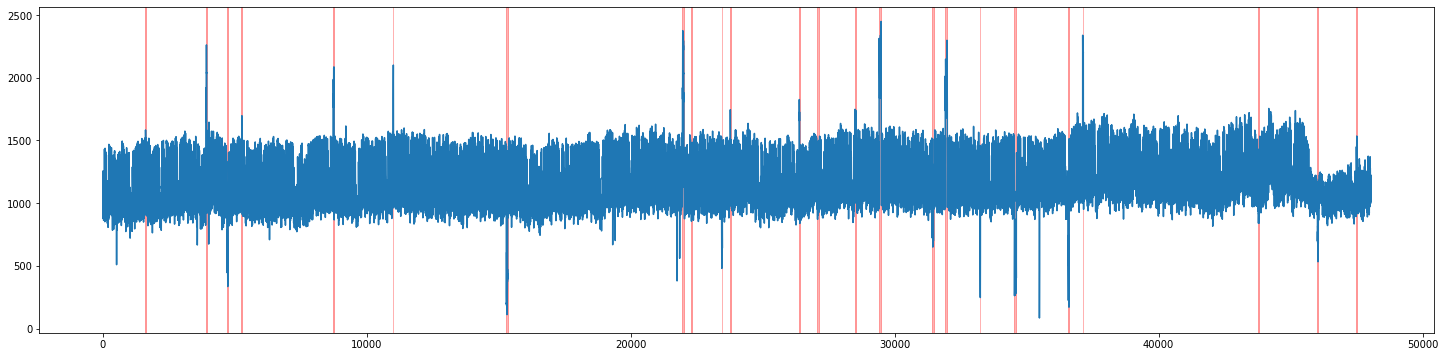

In [31]:
obj = Synthetic_data()
obj.amplitude()
obj.percentage()
obj.plot_graph()

In [27]:
fig = px.line(obj.data)
fig.show()


In [6]:
for k in obj.indices:
    print(k[1]-k[0])

62
25
49
16
55
55
44
25
70
27
60
41
28
41
50
28
46
25
55
